<a href="https://colab.research.google.com/github/ZHIRDILBILDIz/pythonlab1/blob/dev/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22lab_1_np_pandas_matplotlib%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [ ]:
A = np.zeros((6, 3), dtype = int)
A[0::2, 0::2] = 1
A[1::2, 1::2] = 1
# print(A)

B = np.arange(1, 25).reshape(6, 4)
B[1::2] = B[1::2, ::-1]
# print(B)

C = np.random.randint(2, 11, size=(4, 3))
# print(C)

D = np.eye(4, 4, dtype = int)
# print(D)

top = np.hstack((A, B))
bottom = np.hstack((C, D))
S = np.vstack((top, bottom))
# print(S)

F = np.zeros((10, 2), dtype = int)
# print(F)

G = np.hstack((S, F))
# print(G)

# YOUR CODE HERE

## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [ ]:
def find_nearest_neighbour(X, a):
  X_diff = np.abs(X - a)
  return X.reshape(-1)[np.argmin(X_diff)]
# X = np.arange(0, 10).reshape(2, 5)
# X[1, 4] = 15
# a = 3.6
# print(X)
# find_nearest_neighbour(X, a)

## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [ ]:
# Придумайте свои данные для примера, N >= 4
A = np.arange(0, 25).reshape(5, 5)
b = np.arange(0, 5)
X = np.arange(0, 5).reshape(5, 1)

def very_strange_neural_network(A, b, X):
  A = (A @ A)
  X = (A @ X)
  b = (b @ X)
  return b[0]


print(very_strange_neural_network(A, b, X))

115500


## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [ ]:
def find_deep_sea_area(M):
  deep_lower_five = (M < -5)
  return np.sum(deep_lower_five)

def find_water_volume(M):
  return -np.sum(M[M<0])

def find_max_height(M):
  return np.max(M[M > 0])

In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [ ]:
def count_all_islands(a):
  diff = np.concatenate(([0], a))
  diff = np.diff(diff)
  return np.sum(diff == 1)

In [ ]:
a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [ ]:
def swap_mask_for_average(X, a):
  average_value = int(np.mean(X))
  answer = X
  answer = np.where((X > a), average_value, X)
  return answer

In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

# простая проверка для примера выше
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

swap_mask_for_average(M, a)

array([[-7, -3, -1,  0],
       [-4, -3,  1,  2],
       [-2,  0,  4,  2],
       [-1,  3,  2,  2]])

## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [ ]:
def count_trace_diff(M):
  main_diagonal = np.trace(M)
  size_matrix = M.shape[0]
  side_diagonal = np.sum([M[i, size_matrix - i - 1] for i in range(size_matrix)])
  if main_diagonal - side_diagonal > 0:
    return main_diagonal - side_diagonal
  else:
    return side_diagonal - main_diagonal;

In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, 0, 1, 19],
    [-2, 0, 4, 25],
    [0, 3, 6, 9]
])

# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 5)

count_trace_diff(M)

5

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [ ]:
def create_mountain(a):
  size_arr = len(a)
  value = a[:, None] + a[None, :]

  answer = np.zeros((2 * size_arr, 2 * size_arr), dtype = a.dtype)

  answer[:size_arr, :size_arr] = value
  answer[:size_arr, size_arr:] = value
  answer[size_arr:, :size_arr] = value
  answer[size_arr:, size_arr:] = value

  answer[:, size_arr:] = answer[:, size_arr:][:, ::-1]
  answer[size_arr:, :] = answer[size_arr:][::-1]

  return answer

In [ ]:
a = np.array([0, 1, 2, 3, 4])

print(create_mountain(a))

[[0 1 2 3 4 4 3 2 1 0]
 [1 2 3 4 5 5 4 3 2 1]
 [2 3 4 5 6 6 5 4 3 2]
 [3 4 5 6 7 7 6 5 4 3]
 [4 5 6 7 8 8 7 6 5 4]
 [4 5 6 7 8 8 7 6 5 4]
 [3 4 5 6 7 7 6 5 4 3]
 [2 3 4 5 6 6 5 4 3 2]
 [1 2 3 4 5 5 4 3 2 1]
 [0 1 2 3 4 4 3 2 1 0]]


## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [ ]:
def custom_blur(P, C):
  N, M = P.shape
  new_rows = N - C + 1
  new_col = M - C + 1

  answer = np.zeros((new_rows, new_col))

  for row in range(new_rows):
      for col in range(new_col):
          sub_matrix = P[row:row + C, col:col + C]
          answer[row, col] = np.mean(sub_matrix)

  return answer

In [ ]:
# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2 )

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [ ]:
def successful_broadcast(a, b):
  min_len = min(len(a), len(b))
  index = 0

  a_rev = a[::-1]
  b_rev = b[::-1]

  while (index < min_len) and ((a_rev[index] == 1) or (b_rev[index] == 1) or (a_rev[index] == b_rev[index])):
    index += 1

  if min_len == index:
    return True
  else:
    return False

def check_successful_broadcast(*matrices):
  matrix_fixed = matrices[0]

  for matrix in matrices:
    if not(successful_broadcast(matrix_fixed, matrix)):
      return False

  return True

In [ ]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# можно ещё потестировать на своих примерах

## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [ ]:
def pairwise_distances(A, B):
    return np.sqrt(((A[:, np.newaxis] - B[np.newaxis, :]) ** 2).sum(axis = -1))

In [ ]:
A = np.array([[0, 0, 0],
             [1, 1, 1],
             [2, 2, 2]])
B = np.array([[0, 0, 0],
              [1, 1, 1]])

pairwise_distances(A, B)

array([[0.        , 1.73205081],
       [1.73205081, 0.        ],
       [3.46410162, 1.73205081]])

Объясни принцип работы этой одной строчки. Что именно происходит в ней?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ: </font>

A[:, np.newaxis] изменяет форму A с (m, k) на (m, 1, k).Теперь у нас один "разрез" матрицы A для каждого из m векторов, но теперь для каждого вектора A сверяется каждый вектор B. B[np.newaxis, :] изменяет форму B с (n, k) на (1, n, k). Теперь у нас один разрез матрицы B для кадого из n векторов.

В результате выполнения выражения A[:, np.newaxis] - B[np.newaxis, :] происходит вычитание, где каждый вектор из A вычитается из каждого вектора из B. Это приводит к матрице размером (m, n, k), где значение в позиции (i, j) будет равно A[i] - B[j].

**2 возводит каждое значение в этой матрице, в квадрат, что возвращает матрицу с размерами (m, n, k) и элементами (A[i]-B[j])^2

.sum(axis=-1) суммирует по последней оси k, что приводит к матрице размера (m, n) с элементами sigma((a[i]-b[j])^2) предствляющими квадрат расстояний.

mp.sqrt(...) вычисляет квадратный корень из каждого элемента полученной матрицы давая нам попарные евклидовы расстояния между векторами A и B.

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [ ]:
url = "https://drive.google.com/uc?id=1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq"
data = pd.read_csv(url)
print(data)

    Unnamed: 0  N  t, sec  sigma_t, sec  mass, gramm  length, cm  phi, rad
0            1  4     268             1        180.0       121.0      0.16
1            2  4     264             1        180.0       121.0      0.18
2            3  4     275             1        180.0       121.0      0.16
3            4  4     263             1        180.0       121.0      0.17
4            5  4     267             1        180.0       121.0      0.17
5            6  3     235             1        216.0       108.0      0.17
6            7  3     226             1        216.0       108.0      0.15
7            8  3     234             1        216.0       108.0      0.16
8            9  3     229             1        216.0       108.0      0.16
9           10  3     230             1        216.0       108.0      0.18
10          11  6     203             1        614.0       111.0      0.16
11          12  6     207             1        614.0       111.0      0.17
12          13  6     199

## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [ ]:
# YOUR CODE HERE
data.loc[data['mass, gramm'] > 0, 'mass, gramm'] /= 1000
data.loc[data['length, cm'] > 0, 'length, cm'] /= 100;

data.rename(columns = {'mass, gramm': 'mass'}, inplace = True)
data.rename(columns = {'length, cm': 'length'}, inplace = True)
data.rename(columns = {'t, sec': 't'}, inplace = True)
data.rename(columns = {'sigma_t, sec': 'sigma_t'}, inplace = True)
data.rename(columns = {'phi, rad': 'phi'}, inplace = True)
data.rename(columns = {'Unnamed: 0': 'index'}, inplace = True)

for column in data.columns:
  print(column)

assert data.mass.mean() < 0.3
assert np.allclose(data.length.mean(), 1.155)
assert all(' ' not in column for column in data.columns)

data.head()

index
N
t
sigma_t
mass
length
phi


,index,N,t,sigma_t,mass,length,phi
0,1,4,268,1,0.18,1.21,0.16
1,2,4,264,1,0.18,1.21,0.18
2,3,4,275,1,0.18,1.21,0.16
3,4,4,263,1,0.18,1.21,0.17
4,5,4,267,1,0.18,1.21,0.17


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [ ]:
# YOUR CODE HERE
# data['omega'] = ...
# ...
pi = 3.1415926535
g = 9.8

data['omega'] = 2 * pi * data['N'] / data['t']
data['sigma_omega'] = (data['omega'] / data['t']) * data['sigma_t']
data['omega_down'] = data['phi'] / data['t']
data['sigma_down'] = data['sigma_t'] / data['t']
data['momentum'] = data['mass'] * g * data['length']
data['momentum_down'] = data['mass'] * data['phi'] / (data['t'] ** 2) * (data['length'] ** 2)
data['sigma_momentum'] = data['momentum_down'] * 2 * data['sigma_t'] / data['t']

assert np.allclose(data.momentum_down.iloc[0], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 4.4e-09, atol=1e-9)

data.head()


,index,N,t,sigma_t,mass,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,1,4,268,1,0.18,1.21,0.16,0.093779,0.000350,0.000597,0.003731,2.13444,5.870751e-07,4.381157e-09
1,2,4,264,1,0.18,1.21,0.18,0.095200,0.000361,0.000682,0.003788,2.13444,6.806250e-07,5.156250e-09
2,3,4,275,1,0.18,1.21,0.16,0.091392,0.000332,0.000582,0.003636,2.13444,5.575680e-07,4.055040e-09
3,4,4,263,1,0.18,1.21,0.17,0.095562,0.000363,0.000646,0.003802,2.13444,6.477101e-07,4.925552e-09
4,5,4,267,1,0.18,1.21,0.17,0.094130,0.000353,0.000637,0.003745,2.13444,6.284484e-07,4.707479e-09


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [ ]:
# YOUR CODE HERE
# grouped_data = ...
grouped_data = data.groupby('mass')[['omega', 'sigma_omega', 'momentum', 'momentum_down']].mean()

assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

grouped_data

,omega,sigma_omega,momentum,momentum_down
mass,,,,
0.142,0.066661,0.000236,1.683836,4.108862e-07
0.180,0.094012,0.000352,2.134440,6.202853e-07
0.216,0.081687,0.000354,2.286144,7.755223e-07
0.273,0.143300,0.000817,3.263988,2.166527e-06
0.341,0.150752,0.000723,3.675980,1.577406e-06
0.614,0.185194,0.000910,6.679092,3.030996e-06


## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

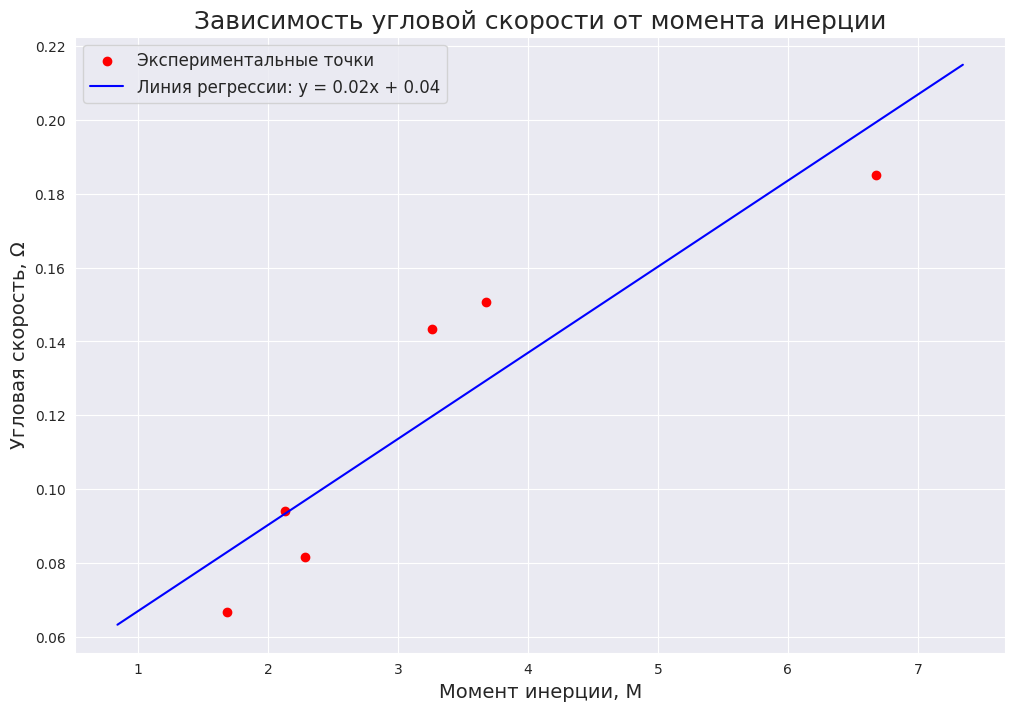

In [ ]:
omegus = np.array(grouped_data.omega)
momentus = np.array(grouped_data.momentum)

coefs = np.polyfit(momentus, omegus, 1)

x_graph = np.linspace(momentus.min() * 0.5, momentus.max() * 1.1, 100)

y_graph = np.polyval(coefs, x_graph)

fig = plt.figure(figsize=(12, 8))

plt.scatter(momentus, omegus, color='red', label='Экспериментальные точки')

plt.plot(x_graph, y_graph, color='blue', label=f'Линия регрессии: y = {coefs[0]:.2f}x + {coefs[1]:.2f}')

plt.title('Зависимость угловой скорости от момента инерции', fontsize=18)
plt.xlabel('Момент инерции, M', fontsize=14)
plt.ylabel('Угловая скорость, Ω', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)

plt.show()


`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [ ]:
grouped_data = data.groupby('mass')[['sigma_down', 'sigma_momentum', 'omega_down', 'momentum_down']].mean()

grouped_data['sigma_down'] *= 10
grouped_data['sigma_momentum'] *= 10



Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

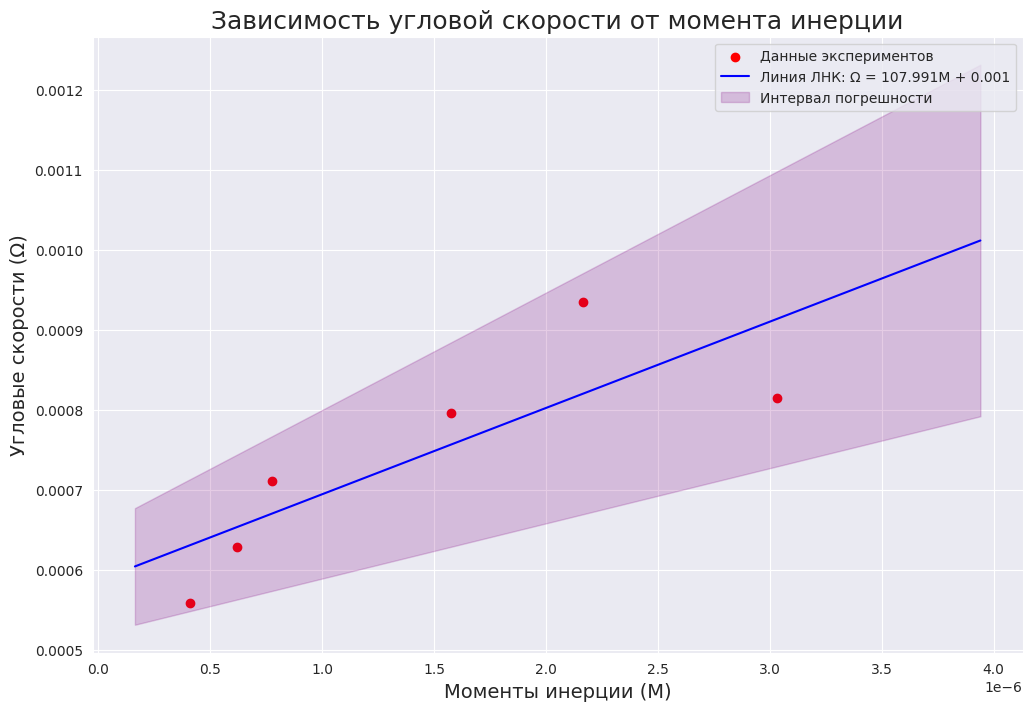

In [ ]:
omegus = np.array(grouped_data.omega_down)
momentus = np.array(grouped_data.momentum_down)
values, number = np.polyfit(momentus, omegus, 1, cov=True)
x_position = np.linspace(momentus.min() * 0.4, momentus.max() * 1.3, 100)
lsq_stds = np.sqrt(np.diag(number))

y_position = np.polyval(values, x_position)
y_position_lower = np.polyval([values[0] - lsq_stds[0], values[1] - lsq_stds[1]], x_position)
y_position_upper = np.polyval([values[0] + lsq_stds[0], values[1] + lsq_stds[1]], x_position)

omagad = plt.figure(figsize=(12, 8))

plt.scatter(momentus, omegus, color='red', label='Данные экспериментов')

plt.plot(x_position, y_position, color='blue', label=f'Линия ЛНК: Ω = {values[0]:.3f}M + {values[1]:.3f}')

plt.fill_between(x_position, y_position_lower, y_position_upper, color='purple', alpha=0.2, label='Интервал погрешности')

plt.xlabel('Моменты инерции (M)', fontsize=14)
plt.ylabel('Угловые скорости (Ω)', fontsize=14)
plt.title('Зависимость угловой скорости от момента инерции', fontsize=18)

plt.grid(True)

plt.legend()

plt.show()


# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

In [ ]:
url = 'https://drive.google.com/uc?id=1Fgv_GP6a2QZ8wAqDabz5609Gp2NLsALN'

iris = pd.read_csv(url)
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Понятно, что колонка Id нам не очень нужна
# Поэтому давайте её удалим - HINT: используйте метод drop

iris = iris.drop(columns=['Id'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [ ]:
species_counts = iris['Species'].value_counts()
print(species_counts)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

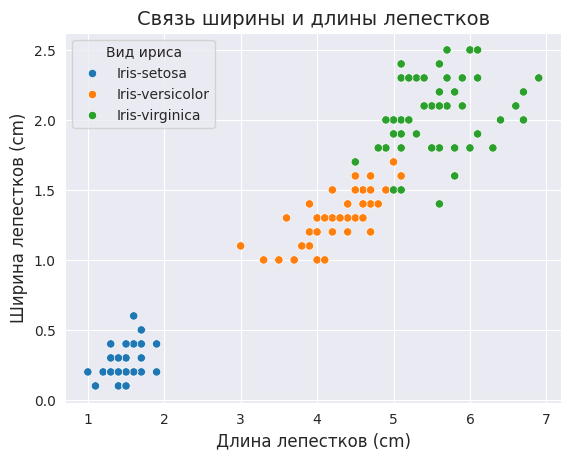

In [ ]:
sns.scatterplot(data=iris, x='PetalLengthCm', y='PetalWidthCm', hue='Species')

plt.title('Связь ширины и длины лепестков', fontsize=14)
plt.xlabel('Длина лепестков (cm)', fontsize=12)
plt.ylabel('Ширина лепестков (cm)', fontsize=12)
plt.legend(title='Вид ириса', fontsize=10)

plt.show()

Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<font color='red'>ВАШ ОТВЕТ ЗДЕСЬ</font>

График хорошо передает основную идею — связь длины и ширины лепестков и их различие между видами. Однако для большей информативности можно добавить детали о данных, трендах и классификационных границах.

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

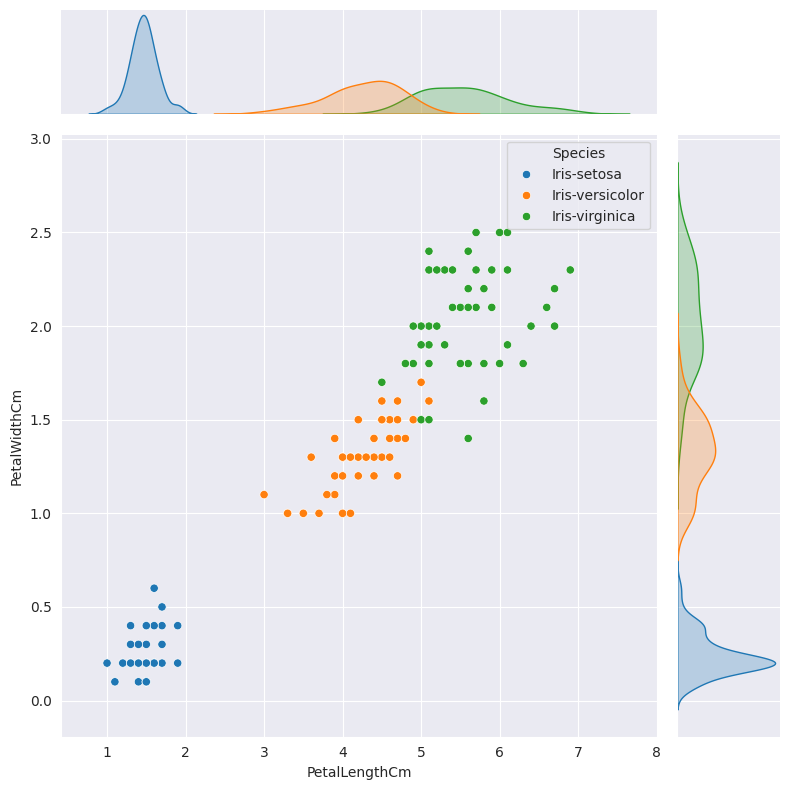

In [ ]:
sns.jointplot(
    data = iris,
    x = 'PetalLengthCm',
    y = 'PetalWidthCm',
    hue = 'Species',
    kind = 'scatter',
    height=8
)

plt.show()

Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Jointplot представляется наиболее полезным в данном случае:

Он одновременно показывает взаимосвязь между длиной и шириной лепестков (как scatterplot) и распределение данных (как гистограммы или плотности).
Это особенно важно, когда нужно понять как общую структуру данных, так и их особенности (например, пересечения или различия между видами).
Однако, если цель — отдельно сравнить распределение для каждого вида ириса, то FacetGrid тоже может быть полезным. Выбор метода зависит от задачи: для общей картины лучше jointplot, для сравнения подгрупп — FacetGrid.

## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

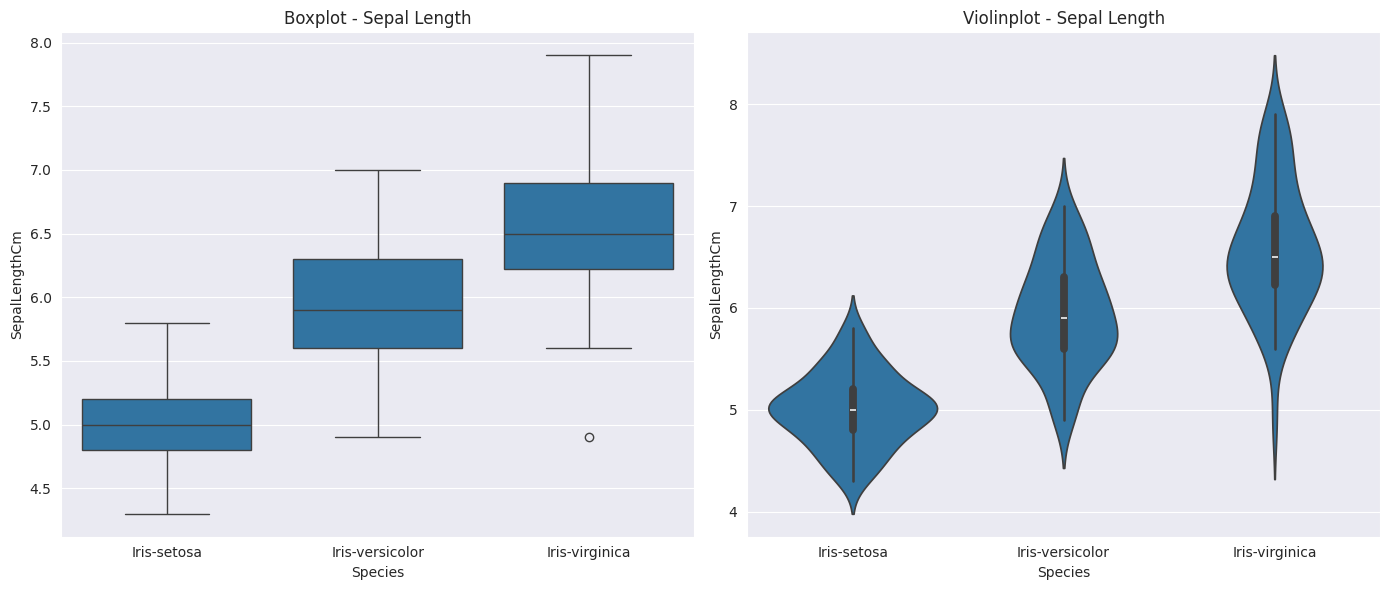

In [ ]:
# Построение boxplot
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=iris)
plt.title('Boxplot - Sepal Length')

# Violinplot
plt.subplot(1, 2, 2)
sns.violinplot(x='Species', y='SepalLengthCm', data=iris)
plt.title('Violinplot - Sepal Length')

plt.tight_layout()
plt.show()

Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Boxplot является более простым и быстрым способом для оценки основных статистических характеристик данных, таких как медиана и выбросы. Он хорош для общих сравнений, но не дает глубоких инсайтов в структуру данных.
Violinplot является более информативным, так как позволяет увидеть подробную картину распределения данных. Он полезен, если нужно понять плотность данных и выявить многомодальные распределения. Визуально он выглядит более привлекательно и зрелищно, что делает его идеальным для презентаций и визуализаций, когда важно не только представить информацию, но и сделать её доступной и интересной для аудитории.
Для быстрой оценки распределения и выявления выбросов предпочтительнее boxplot.
Если же требуется более детальное понимание структуры данных, включая плотность распределения и симметричность/асимметричность, лучше выбрать violinplot.

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

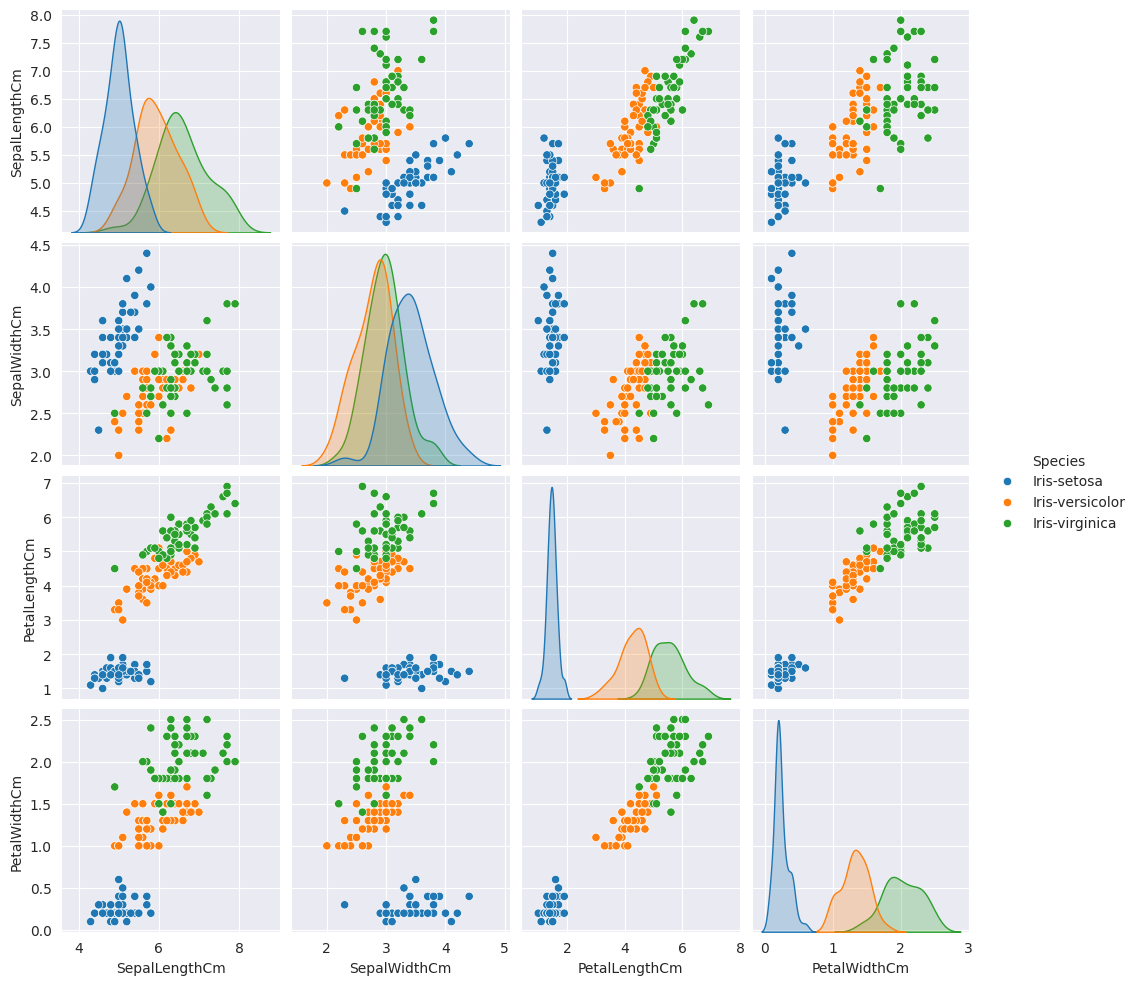

In [ ]:
sns.pairplot(iris, hue='Species', height=2.5)

plt.show()

Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Некоторые признаки, как "длина лепестка" и "ширина лепестка", могут быть очень полезными для различения видов ирисов, поскольку они имеют четкую взаимосвязь и различия между видами.
Для других признаков, как "ширина чашелистика" и "длина лепестка", различия между видами менее выражены.
Для классификации: Графики дают хорошее представление о том, какие признаки лучше использовать для классификации, а какие могут быть менее информативными. Виды ирисов setosa, versicolor и virginica можно легко различить по некоторым признакам, что может помочь в решении задач машинного обучения.

Какие графики находятся на диагонали этой таблицы?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Гистограммы

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

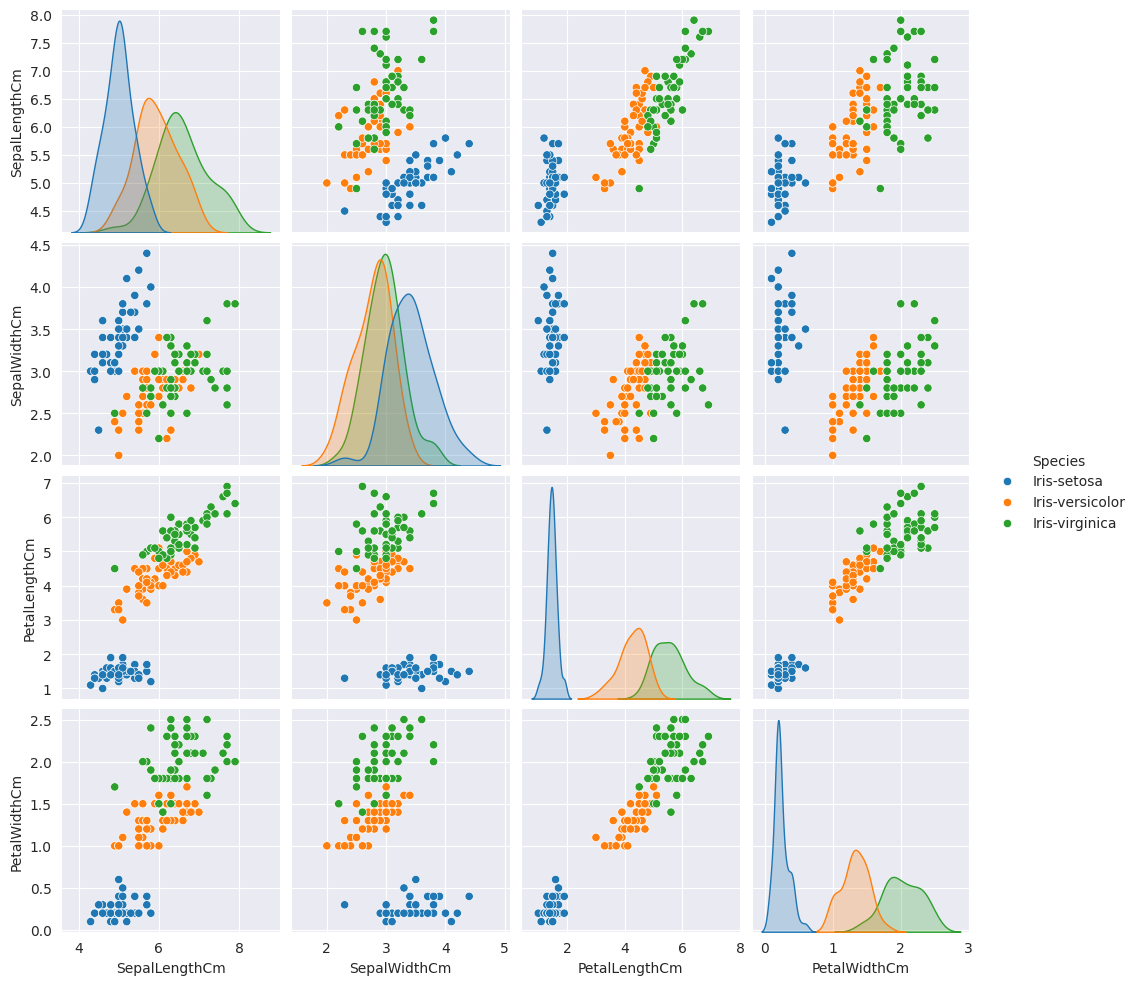

In [ ]:
sns.pairplot(iris, hue='Species', diag_kind='kde', height=2.5)

plt.show()

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Использование графиков плотности на диагонали действительно делает визуализацию более информативной, особенно для оценки формы распределения и выявления многомодальности данных. Визуализация с помощью KDE помогает более точно понять, как распределены значения признаков для разных видов ирисов.